# Temperature Forecast Project

Problem Statement:
    
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings                                                                 
warnings.filterwarnings('ignore') 
%matplotlib inline
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [103]:
df = pd.read_csv('temperature.csv', index_col='Date', parse_dates=True)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [104]:
df.tail()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-30,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
2017-08-30,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
2017-08-30,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
NaT,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
NaT,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7752 entries, 2013-06-30 to NaT
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null

In [106]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [107]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [108]:
df.shape

(7752, 24)

In [109]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


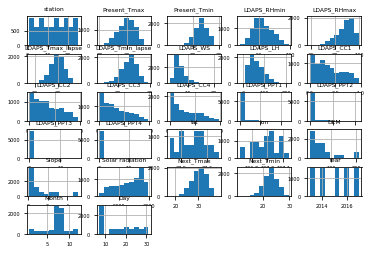

In [122]:
d=df
d.hist()
plt.show()

In [66]:
d.isnull().values.any()

True

In [67]:
#2 Data cleaning
# step 1 show Missing data
missing=pd.DataFrame({'missing':d.isnull().sum()})
missing

,missing
station,2
Date,2
Present_Tmax,70
Present_Tmin,70
LDAPS_RHmin,75
LDAPS_RHmax,75
LDAPS_Tmax_lapse,75
LDAPS_Tmin_lapse,75
LDAPS_WS,75
LDAPS_LH,75


In [68]:
#Removing missing value in Date
d=d[d['Date'].notna()]
#Removing missing avalue  in output attribute
d=d[d['Next_Tmax'].notna()]
d=d[d['Next_Tmin'].notna()]
missing=pd.DataFrame({'missing':d.isnull().sum()})
missing

,missing
station,0
Date,0
Present_Tmax,60
Present_Tmin,60
LDAPS_RHmin,75
LDAPS_RHmax,75
LDAPS_Tmax_lapse,75
LDAPS_Tmin_lapse,75
LDAPS_WS,75
LDAPS_LH,75


In [69]:
#fill all missing value
d['Present_Tmax']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['Present_Tmin']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_RHmin']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_RHmax']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_Tmax_lapse']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_Tmin_lapse']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_WS']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_LH']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_CC1']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_CC2']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_CC3']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_CC4']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_PPT1']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_PPT2']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_PPT3']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())
d['LDAPS_PPT4']=d['Present_Tmax'].fillna(d['Present_Tmax'].mean())


missing=pd.DataFrame({'missing':d.isnull().sum()})
missing

,missing
station,0
Date,0
Present_Tmax,0
Present_Tmin,0
LDAPS_RHmin,0
LDAPS_RHmax,0
LDAPS_Tmax_lapse,0
LDAPS_Tmin_lapse,0
LDAPS_WS,0
LDAPS_LH,0


In [94]:
#There are 25 stations, let's divide all the data according to the stations
#Creating 26 empty lists to store the stations data
#Note here that we need only 25 empty lists to store the data of 25 stations. But I am creating 26 lists
#and will leave the 1st list (index=0) empty, so that if I need the data for station i, I can access
#directly station[i] and get the data. This is done to avoid any confusion.

In [96]:
no_of_stations = 25
station = [[] for _ in range(no_of_stations+1)]

for i in range(1,len(station)):
    station[i] = df.loc[df['station'] == i]

#All the columns are of datatype float64 and since the std. deviaiton is less and the total no. of
#missing values are less, filling all the nan values with the respective column avg.

In [97]:
for i in range(1,len(station)):
    station[i] = station[i].fillna(station[i].mean())
    #station[i].set_index('Date', inplace=True)

#let's plot the geographical locations of the stations from the latitude, longitude data
#create a new dataframe to store all the latitudes and longitudes

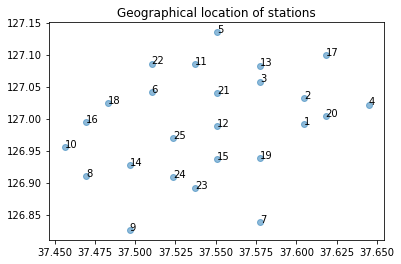

In [98]:
new_data = pd.DataFrame(columns=['lat','lon'], index=range(0,25))
for i in range(0,25):
    new_data['lat'][i] = df['lat'][i]
    new_data['lon'][i] = df['lon'][i]
    
fig, ax = plt.subplots()
ax.scatter(new_data['lat'],new_data['lon'], alpha=0.5)
plt.title('Geographical location of stations')

labels = [i for i in range(1,len(station))]
for i, txt in enumerate(labels):
    ax.annotate(txt, (new_data['lat'][i],new_data['lon'][i]))

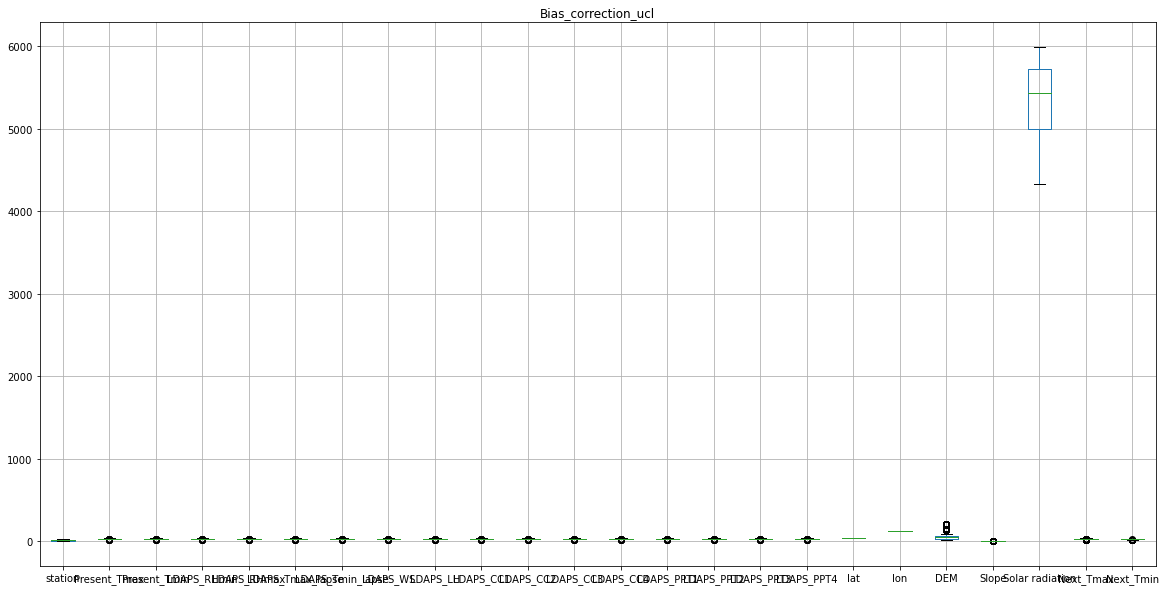

In [70]:
#setp 2 Removing noise
#show figure to detect noise value
atts=list=['station','Date','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH',
      'LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4',
      'lat','lon','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']
plt.figure(figsize=(20,10))
d[atts].boxplot()
plt.title('Bias_correction_ucl')
plt.show()

In [71]:
#step 3 Removing duplicate records
list=['station','Date','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH',
      'LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4',
      'lat','lon','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']
d.drop_duplicates(subset=list,keep='first',inplace=True)
d.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,28.7,28.7,28.7,28.7,28.7,28.7,28.7,...,28.7,28.7,28.7,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,31.9,31.9,31.9,31.9,31.9,31.9,31.9,...,31.9,31.9,31.9,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,31.6,31.6,31.6,31.6,31.6,31.6,31.6,...,31.6,31.6,31.6,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,32.0,32.0,32.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,31.4,31.4,31.4,31.4,31.4,31.4,31.4,...,31.4,31.4,31.4,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,31.9,31.9,31.9,31.9,31.9,31.9,31.9,...,31.9,31.9,31.9,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,31.4,31.4,31.4,31.4,31.4,31.4,31.4,...,31.4,31.4,31.4,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,32.1,32.1,32.1,32.1,32.1,32.1,32.1,...,32.1,32.1,32.1,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,31.4,31.4,31.4,31.4,31.4,31.4,31.4,...,31.4,31.4,31.4,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,31.6,31.6,31.6,31.6,31.6,31.6,31.6,...,31.6,31.6,31.6,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [72]:
#step 5) Removing correlated attributes
d.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113068,0.113068,0.113068,0.113068,0.113068,0.113068,0.113068,0.113068,0.113068,...,0.113068,0.113068,0.113068,-0.238460,-0.118755,-0.257215,-0.091449,-0.020255,0.108306,0.128719
Present_Tmax,0.113068,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.054255,0.007439,-0.188650,-0.106727,-0.026797,0.609838,0.622235
Present_Tmin,0.113068,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.054255,0.007439,-0.188650,-0.106727,-0.026797,0.609838,0.622235
LDAPS_RHmin,0.113068,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.054255,0.007439,-0.188650,-0.106727,-0.026797,0.609838,0.622235
LDAPS_RHmax,0.113068,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.054255,0.007439,-0.188650,-0.106727,-0.026797,0.609838,0.622235
LDAPS_Tmax_lapse,0.113068,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.054255,0.007439,-0.188650,-0.106727,-0.026797,0.609838,0.622235
LDAPS_Tmin_lapse,0.113068,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.054255,0.007439,-0.188650,-0.106727,-0.026797,0.609838,0.622235
LDAPS_WS,0.113068,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.054255,0.007439,-0.188650,-0.106727,-0.026797,0.609838,0.622235
LDAPS_LH,0.113068,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.054255,0.007439,-0.188650,-0.106727,-0.026797,0.609838,0.622235
LDAPS_CC1,0.113068,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.054255,0.007439,-0.188650,-0.106727,-0.026797,0.609838,0.622235


<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

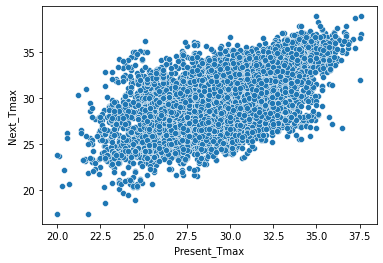

In [89]:
sns.scatterplot(data=df, x="Present_Tmax", y="Next_Tmax")

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

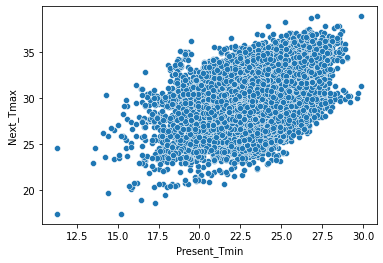

In [90]:
sns.scatterplot(data=df, x="Present_Tmin", y="Next_Tmax")

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

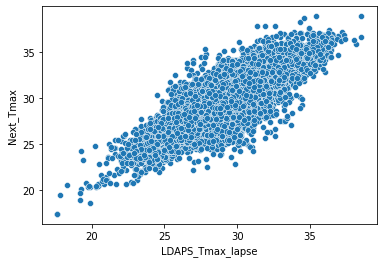

In [91]:
sns.scatterplot(data=df, x="LDAPS_Tmax_lapse", y="Next_Tmax")

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

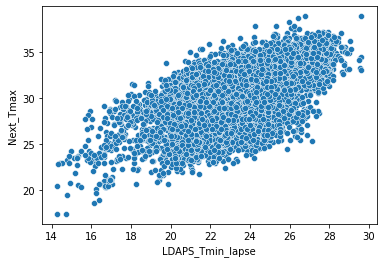

In [92]:
sns.scatterplot(data=df, x="LDAPS_Tmin_lapse", y="Next_Tmax")

<AxesSubplot:xlabel='Next_Tmin', ylabel='Next_Tmax'>

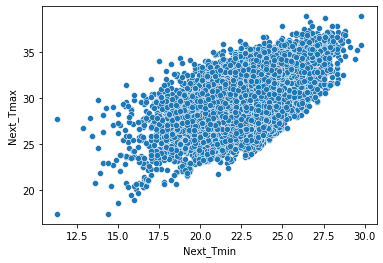

In [93]:
sns.scatterplot(data=df, x="Next_Tmin", y="Next_Tmax")

In [73]:
# step 5) Discretization on numeric attributes 
#binning the slope attributes 
slopeLabels=["Very low", "low", "moderate", "high", "very high"]
q =[0, 1, 2, 3, 4, 6]
d['SlopeLable'] = pd.cut(d['Slope'], bins=q, labels = slopeLabels)
d.head(20)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,SlopeLable
0,1.0,30-06-2013,28.7,28.7,28.7,28.7,28.7,28.7,28.7,28.7,...,28.7,28.7,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,moderate
1,2.0,30-06-2013,31.9,31.9,31.9,31.9,31.9,31.9,31.9,31.9,...,31.9,31.9,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,Very low
2,3.0,30-06-2013,31.6,31.6,31.6,31.6,31.6,31.6,31.6,31.6,...,31.6,31.6,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,Very low
3,4.0,30-06-2013,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,32.0,32.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,moderate
4,5.0,30-06-2013,31.4,31.4,31.4,31.4,31.4,31.4,31.4,31.4,...,31.4,31.4,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,Very low
5,6.0,30-06-2013,31.9,31.9,31.9,31.9,31.9,31.9,31.9,31.9,...,31.9,31.9,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0,Very low
6,7.0,30-06-2013,31.4,31.4,31.4,31.4,31.4,31.4,31.4,31.4,...,31.4,31.4,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4,Very low
7,8.0,30-06-2013,32.1,32.1,32.1,32.1,32.1,32.1,32.1,32.1,...,32.1,32.1,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9,low
8,9.0,30-06-2013,31.4,31.4,31.4,31.4,31.4,31.4,31.4,31.4,...,31.4,31.4,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6,Very low
9,10.0,30-06-2013,31.6,31.6,31.6,31.6,31.6,31.6,31.6,31.6,...,31.6,31.6,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0,very high


In [74]:
d["Date"] = pd.to_datetime(d["Date"]).dt.strftime("%Y%m%d")
print(d["Date"])

0       20130630
1       20130630
2       20130630
3       20130630
4       20130630
          ...   
7745    20170830
7746    20170830
7747    20170830
7748    20170830
7749    20170830
Name: Date, Length: 7723, dtype: object


In [75]:
#Simple linear model for Next_Tmax target
# data preparation
#from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
import numpy as np
#le = LabelEncoder()
#d['Solar radiation'] = le.fit_transform(d['Solar radiation'])
x = np.array(d['Solar radiation']).reshape((-1, 1))
y = d['Next_Tmax']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state = 0)
# model building and training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
# print the line coefficient (slope) and intercept Y = mX + b
print(model.coef_, model.intercept_)
print(model.coef_,'* X + ', model.intercept_)

[5.11395576e-05] 30.002243717868414
[5.11395576e-05] * X +  30.002243717868414


y_pred =  [30.30082577 30.29752125 30.24588431 ... 30.29974085 30.30234979
 30.27869737]


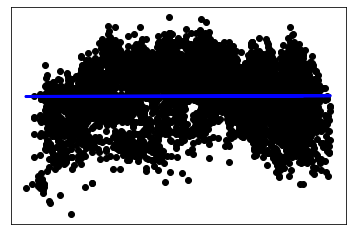

In [76]:
y_pred = model.predict(X_test)
print('y_pred = ', y_pred)
# The coefficients and Intercept

# Plot the output line model
import matplotlib.pyplot as plt
plt.scatter(x, y, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [77]:
# The mean squared error metric
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print ('rmse =',rmse)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

rmse = 3.1223295659690065
Mean squared error: 9.75


In [78]:
#Simple linear model for Next_Tmin target
# data preparation
#from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
import numpy as np
#le = LabelEncoder()
#d['Solar radiation'] = le.fit_transform(d['Solar radiation'])
x = np.array(d['Solar radiation']).reshape((-1, 1))
y = d['Next_Tmin']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state = 0)
# model building and training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
# print the line coefficient (slope) and intercept Y = mX + b
print(model.coef_,'* X + ', model.intercept_)

[0.00068706] * X +  19.262509171928055


y_pred [23.27393279 23.22953686 22.53579905 ... 23.25935702 23.29440792
 22.97663973]


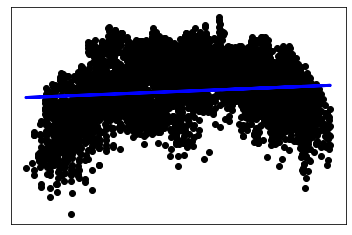

In [79]:
y_pred = model.predict(X_test)
print('y_pred',y_pred)
# Plot the output line model
import matplotlib.pyplot as plt
plt.scatter(x, y, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [80]:
# The mean squared error metric
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print ('rmse = ',rmse)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

rmse =  2.4457056260353007
Mean squared error: 5.98


In [81]:
#Multiple linear model for Next_Tmax 
import numpy as np
#le = LabelEncoder()
#d['Solar radiation'] = le.fit_transform(d['Solar radiation'])
#x = np.array(d['Solar radiation'],d['Present_Tmax'],d['LDAPS_RHmax'],d['LDAPS_Tmax_lapse'],d['LDAPS_WS'],d['LDAPS_LH'],d['LDAPS_PPT4'],d['lat'],d['DEM'],d['Slope'])
x = np.array(d[['Solar radiation','LDAPS_Tmax_lapse','LDAPS_LH','Slope']])
y = d['Next_Tmax']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state = 0)
# model building and training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
# print the line coefficient (slope) and intercept Y = m1X1+ m2X2 + b
print(model.coef_, model.intercept_)
print(model.coef_[0],'* X1 + ', model.coef_[1],'* X2 + ',model.intercept_)
y_pred = model.predict(X_test)
print('y_pred= ',y_pred )

[ 1.77247534e-04  3.20235562e-01  3.20235562e-01 -9.22640166e-02] 10.37795523353195
0.0001772475335310791 * X1 +  0.3202355622206392 * X2 +  10.37795523353195
y_pred=  [31.89179872 29.68078987 31.44784783 ... 29.64763763 28.88952897
 32.54768397]


In [82]:
# The mean squared error metric

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print ('rmse =',rmse)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

rmse = 2.493805698558381
Mean squared error: 6.22


In [83]:
#Multiple linear model for Next_Tmin
import numpy as np
#le = LabelEncoder()
#d['Solar radiation'] = le.fit_transform(d['Solar radiation'])
#x = np.array(d['Solar radiation'],d['Present_Tmax'],d['LDAPS_RHmax'],d['LDAPS_Tmax_lapse'],d['LDAPS_WS'],d['LDAPS_LH'],d['LDAPS_PPT4'],d['lat'],d['DEM'],d['Slope'])
x = np.array(d[['Solar radiation','lat','LDAPS_Tmin_lapse','LDAPS_RHmin','lon','LDAPS_LH','LDAPS_RHmin','Slope']])
y = d['Next_Tmin']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state = 0)
# model building and training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
# print the line coefficient (slope) and intercept Y = m1X1+ m2X2 + b
print(model.coef_, model.intercept_)
print(model.coef_[0],'* X1 + ', model.coef_[1],'* X2 + ',model.intercept_)
y_pred = model.predict(X_test)
print('y_pred =',y_pred )

[ 8.04507521e-04 -1.97266748e+00  1.29206574e-01  1.29206574e-01
 -1.22148930e+00  1.29206574e-01  1.29206574e-01 -1.49580700e-01] 232.6193884634481
0.0008045075212420048 * X1 +  -1.9726674841336296 * X2 +  232.6193884634481
y_pred = [24.79012575 23.09898639 23.58656849 ... 22.82557556 22.25250839
 24.3876915 ]


In [84]:
# The mean squared error metric
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print ('rmse = ',rmse)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

rmse =  1.8996198500997907
Mean squared error: 3.61


No handles with labels found to put in legend.


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7745    0.0
7746    0.0
7747    0.0
7748    0.0
7749    0.0
Name: Solar radiation, Length: 7723, dtype: float64
[<matplotlib.lines.Line2D object at 0x000001B87BCEEEB0>, <matplotlib.lines.Line2D object at 0x000001B87BCEEF70>]


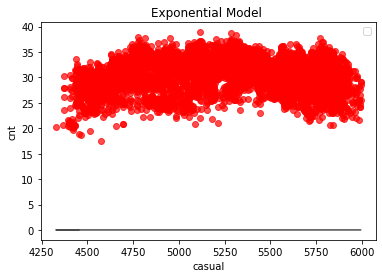

rmse = 30.43610854484553
Mean squared error: 926.36


In [85]:
#Simple Non-linear model (Exponential model using) Next_Tmax attrbuite 
import matplotlib.pyplot as plt
import numpy as np
#from exporeal import *
from scipy.optimize import curve_fit

#Fitting function
def exponential(t,X,a):
    y= X*np.exp(a*t)
    return y
  


#Experimental x and y data points    
x = d['Solar radiation']
y = d['Next_Tmax']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state = 0)

popt, pcov = curve_fit(exponential, x, y,[1,-1])



model5=exponential(x,popt[0],popt[1])
print(model5)

t= plt.plot(x,model5,'k-',x, y,'ro', alpha=0.7) # – means lines
print (t)
plt.legend()
plt.title("Exponential Model ")
plt.xlabel("casual")
plt.ylabel("cnt")
plt.show()
# model evaluation 
 
rmse = np.sqrt(mean_squared_error(y, model5))
print ('rmse =',rmse)
print("Mean squared error: %.2f" % mean_squared_error(y, model5)) 

No handles with labels found to put in legend.


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7745    0.0
7746    0.0
7747    0.0
7748    0.0
7749    0.0
Name: Solar radiation, Length: 7723, dtype: float64
[<matplotlib.lines.Line2D object at 0x000001B87BDB8C40>, <matplotlib.lines.Line2D object at 0x000001B87BDB8D00>]


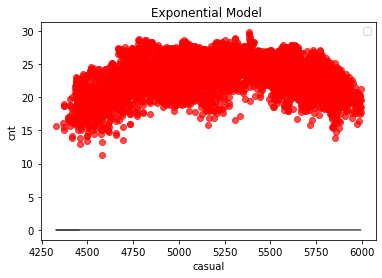

23.066868072914755
Mean squared error: 532.08


In [86]:
#Simple Non-linear model (Exponential model using) Next_Tmin attrbuite 
import matplotlib.pyplot as plt
import numpy as np
#from exporeal import *
from scipy.optimize import curve_fit

#Fitting function
def exponential(t,X,a):
    y= X*np.exp(a*t)
    return y
#Experimental x and y data points    
x = d['Solar radiation']
y = d['Next_Tmin']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state = 0)

popt, pcov = curve_fit(exponential, x, y,[1,-1])


#print (popt)
#print (pcov)
model5=exponential(x,popt[0],popt[1])
print(model5)

t= plt.plot(x,model5,'k-',x, y,'ro', alpha=0.7) # – means lines
print (t)
plt.legend()
plt.title("Exponential Model ")
plt.xlabel("casual")
plt.ylabel("cnt")
plt.show()
# model evaluation 
  
rmse = np.sqrt(mean_squared_error(y, model5))
print (rmse)
print("Mean squared error: %.2f" % mean_squared_error(y, model5)) 
   


In [87]:
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
#  import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline

x = np.array(d[['Solar radiation','LDAPS_Tmax_lapse','LDAPS_LH','Slope']])
y = d['Next_Tmax']


# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000

# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 3

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state = 0)


# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it 
for degree in range(degree_min,degree_max+1):
       model = make_pipeline(PolynomialFeatures(1, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
model.fit(x,y)
y_pred = model.predict(X_test)
print("\n\npredict is : \n")
print(y_pred)

RMSE=np.sqrt(np.sum(np.square(y_pred-y_test)))
test_score = model.score(X_test,y_test)
print("\nscore: ",test_score)

print("\nRMSE: ",RMSE)

#The mean squared error metric 
from sklearn.metrics import mean_squared_error 
print("\nMean squared error: %.2f" % mean_squared_error(y_test,y_pred))



predict is : 

[31.82196451 29.63105038 31.45118146 ... 29.60553675 28.8396617
 32.58432805]

score:  0.36174242216123054

RMSE:  120.0463841391514

Mean squared error: 6.22


In [88]:
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
#  import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline

x = np.array(d[['Solar radiation','lat','LDAPS_Tmin_lapse','lon','Slope']])
y = d['Next_Tmin']


# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000

# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 3

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state = 0)


# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it 
for degree in range(degree_min,degree_max+1):
       model = make_pipeline(PolynomialFeatures(1, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
model.fit(x,y)
y_pred = model.predict(X_test)
print("\n\npredict is : \n")
print(y_pred)

RMSE=np.sqrt(np.sum(np.square(y_pred-y_test)))
test_score = model.score(X_test,y_test)
print("\nscore: ",test_score)

print("\nRMSE: ",RMSE)

#The mean squared error metric 
from sklearn.metrics import mean_squared_error 
print("\nMean squared error: %.2f" % mean_squared_error(y_test,y_pred))



predict is : 

[24.78956965 23.09844351 23.58660148 ... 22.82533976 22.25232159
 24.38798179]

score:  0.4019722387291016

RMSE:  91.43822334615619

Mean squared error: 3.61


<b>Conclusion</b>

In this study, we evaluated the bias correction performance of three machine learning methods and their ensemble for improving the LDAPS model outputs of Tmax and Tmin in Seoul Metropolitan Area. The bias correction models were developed by fusing a total of 14 LDAPS model forecast data, Tmax and Tmin of in‐situ observations, and five auxiliary data as input variables. 


When forecasting Tmax
, the LDAPS model had an R2
of 0.69, a bias of −0.85 °C and an RMSE of
2.08 °C, whereas according to hindcast validation all bias correction models improved performance with
R
2
ranging from 0.75 to 0.78, biases from −0.16 to −0.07 °C and RMSEs from 1.55 to 1.66 °C. When
forecasting Tmin, the LDAPS model had an R2 of 0.77, a bias of 0.51 °C and an RMSE of 1.43 °C,whereas the bias correction models showed R2from 0.86 to 0.87, biases from −0.03 to 0.03 °C and

RMSEs from 0.91 to 1.02 °C. LOSOCV for the four machine learning approaches also revealed corresponding improvements when compared to the NWP model for both Tmax and Tmin

In particular,
the MME model, the ensemble method of three different machine learning approaches, demonstrated
its strength by producing more stable and accurate results compared to single machine learning models
in terms of temporal and spatial aspects. We found that the weather stations where the LDAPS model
had a large elevation bias showed a distinct improvement in performance after bias correction, which
helps the spatial distribution of air temperature derived from the machine learning models be much more
similar to that of in‐situ observed air temperatures. Despite the necessity for more investigation with other
NWP models, this approach is likely to be successful if applied to other NWP models for the study area
that can predict temperatures deterministically over the next‐day. This is because we confirmed that the


